In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
%ls

MyDrive/


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('indonesian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading indonesian: Package 'indonesian' not found
[nltk_data]     in index


False

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/gdrive/MyDrive/FD-WAVE 11/Gold Challenge/tweet_bersih_full_version.csv")
dfa = pd.read_csv("/gdrive/MyDrive/FD-WAVE 11/Gold Challenge/abusive.csv")

In [6]:
df

,Tweet,Tweets_clean,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu e...,Negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,user user aku itu aku n nku tau matamu sipit t...,Negative
4,USER USER Kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,Negative
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,user jangan asal ngomong ndasmu congor lu yg s...,Negative
13165,USER Kasur mana enak kunyuk',user kasur mana enak kunyuk,Positive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,user hati hati bisu g n nlagi bosan huft xf0 x...,Neutral
13167,USER USER USER USER Bom yang real mudah terdet...,user user user user bom yang real mudah terdet...,Negative


In [7]:
df.head()

,Tweet,Tweets_clean,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu e...,Negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,user user aku itu aku n nku tau matamu sipit t...,Negative
4,USER USER Kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,Negative


In [8]:
df.tail()

,Tweet,Tweets_clean,Sentiment
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,user jangan asal ngomong ndasmu congor lu yg s...,Negative
13165,USER Kasur mana enak kunyuk',user kasur mana enak kunyuk,Positive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,user hati hati bisu g n nlagi bosan huft xf0 x...,Neutral
13167,USER USER USER USER Bom yang real mudah terdet...,user user user user bom yang real mudah terdet...,Negative
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",user mana situ ngasih itu cuma foto ya kutil onta,Negative


In [9]:
df.shape

(13169, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet         13169 non-null  object
 1   Tweets_clean  13169 non-null  object
 2   Sentiment     13169 non-null  object
dtypes: object(3)
memory usage: 308.8+ KB


In [11]:
df.describe()

,Tweet,Tweets_clean,Sentiment
count,13169,13169,13169
unique,13023,12959,3
top,USER USER USER USER USER USER USER USER USER U...,user user user user user user user user user u...,Negative
freq,9,12,8710


In [12]:
df.duplicated().sum()

146

In [13]:
dfa.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


<Axes: xlabel='Sentiment'>

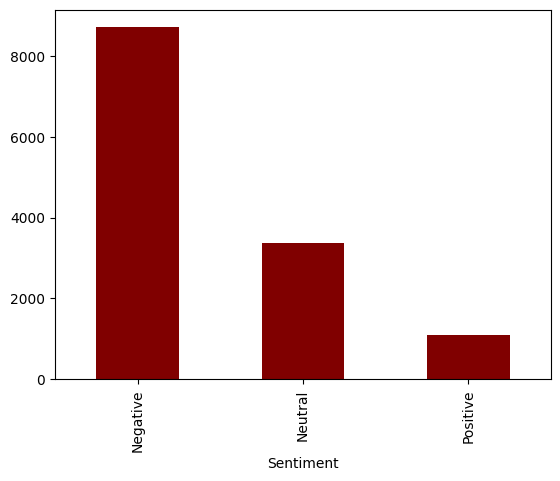

In [14]:
df.groupby('Sentiment').Sentiment.count().plot(kind='bar',color=['maroon'])

In [15]:
df['total_char'] = df.Tweet.apply(len)

In [16]:
df['total_word'] = df.Tweet.apply(lambda sent: len(sent.split()))

<Axes: >

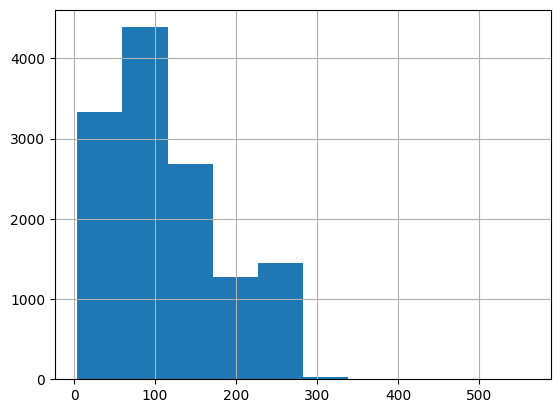

In [17]:
df.total_char.hist()

<Axes: >

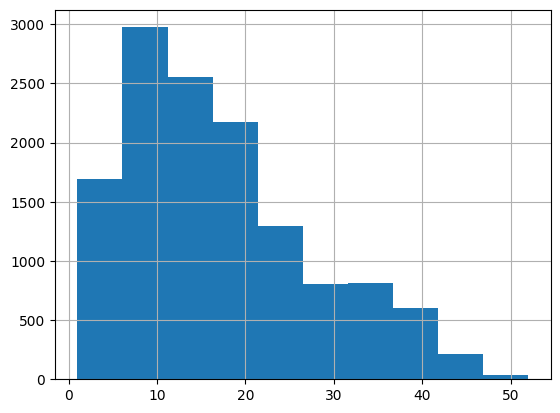

In [18]:
df.total_word.hist()

In [19]:
df['Tweet'] = df['Tweet'].str.replace('USER', '')
print(df)

                                                   Tweet  \
0      - disaat semua cowok berusaha melacak perhatia...   
1      RT :  siapa yang telat ngasih tau elu?edan sar...   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   
3        AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILI...   
4        Kaum cebong kapir udah keliatan dongoknya da...   
...                                                  ...   
13164   jangan asal ngomong ndasmu. congor lu yg seka...   
13165                            Kasur mana enak kunyuk'   
13166   Hati hati bisu :( .g\n\nlagi bosan huft \xf0\...   
13167      Bom yang real mudah terdeteksi bom yang te...   
13168   Mana situ ngasih(": itu cuma foto ya kutil onta'   

                                            Tweets_clean Sentiment  \
0      disaat semua cowok berusaha melacak perhatian ...  Negative   
1      rt user user siapa yang telat ngasih tau elu e...  Negative   
2      41 kadang aku berfikir kenapa aku tetap percay...  Negative   

In [20]:
df['Tweets_clean'] = df['Tweets_clean'].str.replace('user', '')
print(df)

                                                   Tweet  \
0      - disaat semua cowok berusaha melacak perhatia...   
1      RT :  siapa yang telat ngasih tau elu?edan sar...   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   
3        AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILI...   
4        Kaum cebong kapir udah keliatan dongoknya da...   
...                                                  ...   
13164   jangan asal ngomong ndasmu. congor lu yg seka...   
13165                            Kasur mana enak kunyuk'   
13166   Hati hati bisu :( .g\n\nlagi bosan huft \xf0\...   
13167      Bom yang real mudah terdeteksi bom yang te...   
13168   Mana situ ngasih(": itu cuma foto ya kutil onta'   

                                            Tweets_clean Sentiment  \
0      disaat semua cowok berusaha melacak perhatian ...  Negative   
1      rt   siapa yang telat ngasih tau elu edan sara...  Negative   
2      41 kadang aku berfikir kenapa aku tetap percay...  Negative   

In [21]:
df.head()

,Tweet,Tweets_clean,Sentiment,total_char,total_word
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative,138,25
1,RT : siapa yang telat ngasih tau elu?edan sar...,rt siapa yang telat ngasih tau elu edan sara...,Negative,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative,254,37
3,AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILI...,aku itu aku n nku tau matamu sipit tapi dili...,Negative,75,14
4,Kaum cebong kapir udah keliatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya da...,Negative,89,14


In [22]:
df['total_char'] = df.Tweet.apply(len)

In [23]:
df['total_word'] = df.Tweet.apply(lambda sent: len(sent.split()))

In [24]:
df.mean()

<ipython-input-24-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


total_char    109.229554
total_word     16.113752
dtype: float64

In [25]:
df.median()

<ipython-input-25-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


total_char    94.0
total_word    14.0
dtype: float64

In [26]:
df['total_char'].mode()

0    254
Name: total_char, dtype: int64

In [27]:
df['total_word'].mode()

0    8
Name: total_word, dtype: int64

<Axes: ylabel='Sentiment'>

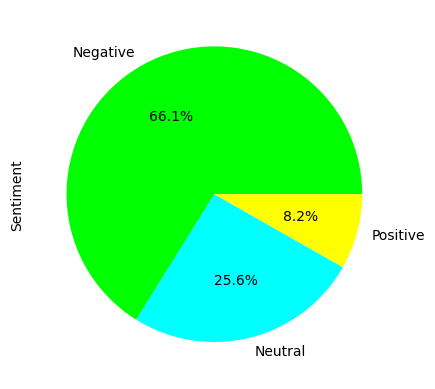

In [28]:
# untuk nunjukkin pie chart dari tiap sentiment
df.groupby('Sentiment').Sentiment.count().plot(kind='pie',autopct='%1.1f%%',colors=['lime','aqua','yellow'])

In [29]:
# Menghitung berapa banyak data di tiap nilai sentiment
df['Sentiment'].value_counts()

Negative    8710
Neutral     3376
Positive    1083
Name: Sentiment, dtype: int64

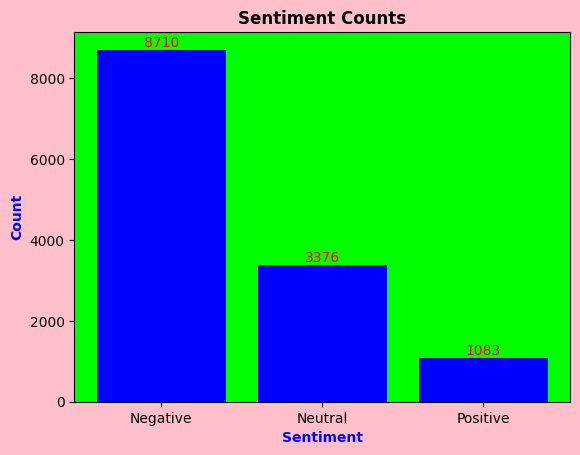

In [30]:
# Assuming you have already imported pandas and df is your DataFrame

# Group by 'Sentiment' and get the counts
Sentiment_counts = df['Sentiment'].value_counts()

# Create the bar plot
plt.figure(facecolor='pink')
plt.subplot(facecolor='lime')
plt.bar(Sentiment_counts.index, Sentiment_counts, color='blue')

# Add labels to the bars
for i, count in enumerate(Sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom',color='red')

# Add axis labels and title
plt.xlabel('Sentiment',color="blue",fontweight="bold")
plt.ylabel('Count', color="blue",fontweight='bold')
plt.title('Sentiment Counts',fontweight='bold')

# Show the plot
plt.show()

In [31]:
pip install wordcloud matplotlib

In [32]:
count_abuse = dfa["ABUSIVE"].apply(lambda word: df['Tweets_clean'].str.contains(word, case=False).sum())

In [33]:
dfa["Count"] = count_abuse

In [34]:
dfa

,ABUSIVE,Count
0,alay,61
1,ampas,35
2,buta,144
3,keparat,41
4,anjing,149
...,...,...
120,rezim,333
121,sange,32
122,serbet,5
123,sipit,163


In [35]:
from wordcloud import WordCloud

In [36]:
# Pertama kita memberi nama "abusive_words" untuk untuk kolom "ABUSIVE" dan menjadikannya list(dalam python).
abusive_words = dfa["ABUSIVE"].tolist()

In [37]:
# kolom "Tweets_clean" akan dipanggil dengan fungsi join() dan dengan itarable(list) dan menggabungkan elemen-elemennya menjadi satu string
# dengan bantuan " ' ' ".
# Pada dasarnya, fungsi join() menggabungkan kolom "Tweets_clean" yang dipisahkan dengan spasi dan memasukjannya ke variabel 'text'.
text = ' '.join(df['Tweets_clean'])
wordcloud = WordCloud().generate(text)

In [38]:
# Singkatnya, kode memfilter kata-kata dari teks tweet asli (teks) dan membuat string baru (filtered_text) yang hanya berisi kata-kata yang ada dalam daftar Abusive_words.
# Ini berguna untuk mengidentifikasi dan mengekstraksi kata-kata kasar dari teks tweet untuk analisis atau visualisasi lebih lanjut.
filtered_text = ' '.join(word for word in text.split() if word in abusive_words)

In [39]:
# Singkatnya, kode menghitung frekuensi kata-kata dari daftar "abusive_words" dalam teks tweet ('text') dan menyimpannya dalam kamus bernama word_frequencies.
# Ini berguna untuk menganalisis dan memvisualisasikan frekuensi kata-kata kasar dalam teks tweet.
word_frequencies = {word: text.split().count(word) for word in abusive_words}

In [40]:
# Metode 'generate_from_frequencies()' memproses kamus input dan menghasilkan cloud kata, di mana ukuran setiap kata sebanding dengan frekuensinya dalam data input.
# Hasilnya, variabel wordcloud akan berisi word cloud yang dihasilkan berdasarkan frekuensi kata yang disediakan dalam kamus 'word_frequencies'.
# Wordcloud selanjutnya dapat digunakan untuk visualisasi atau disimpan sebagai gambar.
wordcloud = WordCloud().generate_from_frequencies(word_frequencies)

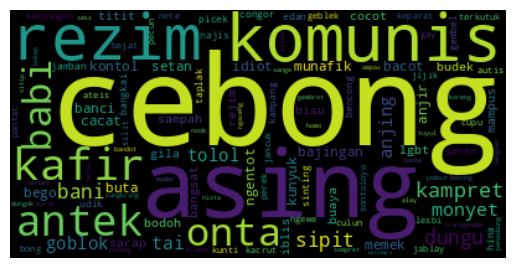

In [41]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Pengkaitan Abusive dengan Sentiment pada Tweet

In [42]:
abusing = dfa["ABUSIVE"]
tweet = df["Tweets_clean"]

In [43]:
def contains_abusive_word(tweet):
    return any(word in tweet.lower() for word in abusing)

In [44]:
df['Contains_Abusive_Word'] = tweet.apply(contains_abusive_word)
df['Contains_Abusive_Word'] = df['Contains_Abusive_Word'].map({True: 'Yes', False: 'No'})

In [45]:
df

,Tweet,Tweets_clean,Sentiment,total_char,total_word,Contains_Abusive_Word
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative,138,25,Yes
1,RT : siapa yang telat ngasih tau elu?edan sar...,rt siapa yang telat ngasih tau elu edan sara...,Negative,112,20,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative,254,37,No
3,AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILI...,aku itu aku n nku tau matamu sipit tapi dili...,Negative,67,12,Yes
4,Kaum cebong kapir udah keliatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya da...,Negative,81,12,Yes
...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu. congor lu yg seka...,jangan asal ngomong ndasmu congor lu yg sekat...,Negative,57,9,Yes
13165,Kasur mana enak kunyuk',kasur mana enak kunyuk,Positive,24,4,Yes
13166,Hati hati bisu :( .g\n\nlagi bosan huft \xf0\...,hati hati bisu g n nlagi bosan huft xf0 x9f x...,Neutral,58,8,Yes
13167,Bom yang real mudah terdeteksi bom yang te...,bom yang real mudah terdeteksi bom yang te...,Negative,119,18,No


In [46]:
in1 = df[(df['Sentiment'] == 'Positive') & (df['Contains_Abusive_Word'] == 'Yes')]
in2 = df[(df['Sentiment'] == 'Neutral') & (df['Contains_Abusive_Word'] == 'Yes')]
in3 = df[(df['Sentiment'] == 'Negative') & (df['Contains_Abusive_Word'] == 'No')]

In [47]:
def classify_accuracy(df):
    if df['Sentiment'] in ['Positive', 'Neutral'] and df['Contains_Abusive_Word'] == 'Yes':
        return 'Inaccurate'
    elif df['Sentiment'] == 'Negative' and df['Contains_Abusive_Word'] == 'No':
        return 'Inaccurate'
    else:
        return 'Accurate'

In [48]:
df['Accuracy'] = df.apply(classify_accuracy, axis=1)

In [49]:
df

,Tweet,Tweets_clean,Sentiment,total_char,total_word,Contains_Abusive_Word,Accuracy
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative,138,25,Yes,Accurate
1,RT : siapa yang telat ngasih tau elu?edan sar...,rt siapa yang telat ngasih tau elu edan sara...,Negative,112,20,Yes,Accurate
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative,254,37,No,Inaccurate
3,AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILI...,aku itu aku n nku tau matamu sipit tapi dili...,Negative,67,12,Yes,Accurate
4,Kaum cebong kapir udah keliatan dongoknya da...,kaum cebong kapir udah keliatan dongoknya da...,Negative,81,12,Yes,Accurate
...,...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu. congor lu yg seka...,jangan asal ngomong ndasmu congor lu yg sekat...,Negative,57,9,Yes,Accurate
13165,Kasur mana enak kunyuk',kasur mana enak kunyuk,Positive,24,4,Yes,Inaccurate
13166,Hati hati bisu :( .g\n\nlagi bosan huft \xf0\...,hati hati bisu g n nlagi bosan huft xf0 x9f x...,Neutral,58,8,Yes,Inaccurate
13167,Bom yang real mudah terdeteksi bom yang te...,bom yang real mudah terdeteksi bom yang te...,Negative,119,18,No,Inaccurate


In [50]:
# bar chart
# x = abusive or no
# y = nilai count dari yes and no


<Axes: ylabel='Accuracy'>

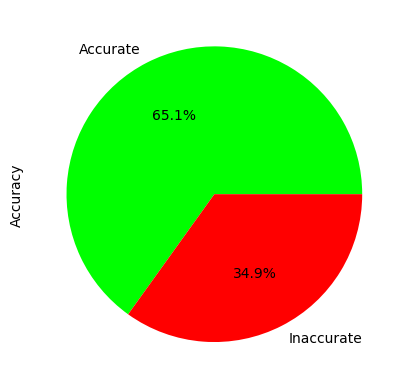

In [51]:
# pie chart
# Tingkat akurasi accurate/innacurate
df.groupby('Accuracy').Accuracy.count().plot(kind='pie',autopct='%1.1f%%',colors=['lime','red'])

In [52]:
df['Accuracy'].value_counts()

Accurate      8572
Inaccurate    4597
Name: Accuracy, dtype: int64

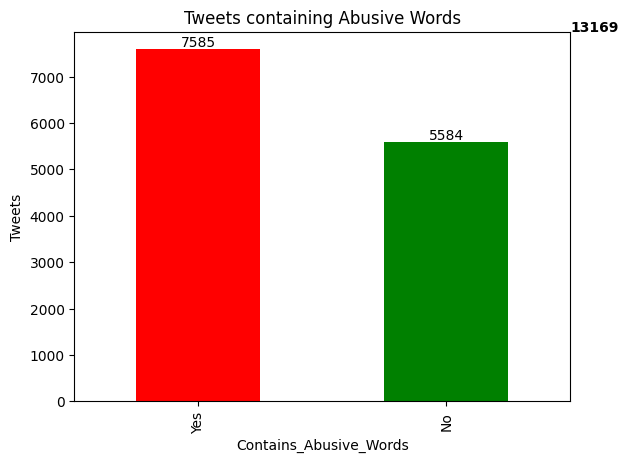

In [53]:
# Assuming you have read the CSV file into a DataFrame called 'df'
# For example:
# df = pd.read_csv("/path/to/your_csv_file.csv")

# Group the data by the "Contains_Abusive_Words" column and count the occurrences of each value
contains_abusive_counts = df['Contains_Abusive_Word'].value_counts()

# Create a bar plot
contains_abusive_counts.plot(kind='bar', color=['red', 'green'])

# Add labels to the bars
for index, value in enumerate(contains_abusive_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Add title and labels to the plot
plt.title('Tweets containing Abusive Words')
plt.xlabel('Contains_Abusive_Words')
plt.ylabel('Tweets')
text = df["Tweets_clean"].count()
plt.text(1, 1, text, transform=plt.gca().transAxes, fontsize=10, color='black', fontweight="bold")

# Show the bar plot
plt.show()

In [54]:
# cocokin sama slide 17, mana yang positif-netral tapi mengandung abusive dan negatif tidak mengandung kata abusive sama sekali.

In [55]:
df['Contains_Abusive_Word'].value_counts()

Yes    7585
No     5584
Name: Contains_Abusive_Word, dtype: int64